# example

In [1]:
from numpy import *
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# 초기값

S0 = 100
K = 105
T = 1
r = 0.05
sigma = 0.2

In [3]:
I = 10000                                                     # 시뮬레이션 횟수
z = random.standard_normal(I)                                 # 난수
St = S0 * exp(T * (r - 0.5 * sigma ** 2) + sigma * sqrt(T) * z)  # 만기 주가지수
Ht = maximum(St-K,0)                                      # 만기 옵션가치
C0 = exp(-r*T)*sum(Ht)/I                                     # 몬테카를로 추정식

In [4]:
print(St)
print(C0)

[110.06564541  80.63202044  93.86572007 ...  80.90873785  85.44779491
  92.2847079 ]
7.976295967566565


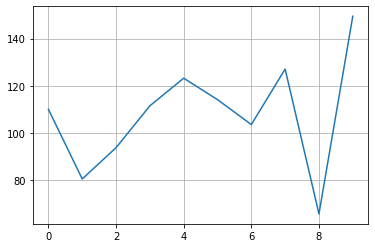

In [5]:
plt.plot(St[:10])
plt.grid(True)

# 내재변동성

In [6]:
import math
from time import time
from scipy import stats
from random import gauss, seed

In [7]:
def bsm_call_value(S0, K, T, r, sigma): # 블랙-숄즈 공식
    
    d1 = (log(S0/K)+(r + 0.5 * sigma**2)*T)/(sigma*sqrt(T))
    d2 = (log(S0/K)+(r - 0.5 * sigma**2)*T)/(sigma*sqrt(T))
    value = S0 * stats.norm.cdf(d1,0.0,1.0) - exp(-r*T)*K*stats.norm.cdf(d2,0.0,1.0)
    
    return value

def bsm_vega(S0,K,T,r,sigma): # 베가 공식
    
    d1 = (log(S0/K)+(r + 0.5 * sigma**2)*T)/(sigma*sqrt(T))
    vega = S0* stats.norm.pdf(d1,0.0,1.0)*sqrt(T)
    
    return vega

    
def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it = 100 ): # 내재변동성(뉴턴 method)
    # sigma_est - 변동성 초기 추정치
    
    for i in range(it):
        
        sigma_est -= (bsm_call_value(S0, K, T, r, sigma_est) - C0) / bsm_vega(S0, K, T, r, sigma_est)
        
        return sigma_est

In [8]:
bsm_call_value(S0,K,T,r,sigma)

8.021352235143176

# 콜옵션가격(몬테카를로 시뮬레이션)1

In [9]:
seed(20000)
t0 = time()

M = 50
dt = T/M
I = 250000

S = []

for i in range(I):
    
    path = []
    
    for t in range(M+1):
        
        if t == 0:
            path.append(S0)
    
        else:
            z = gauss(0.0,1.0)
            St = path[t-1]*exp((r-0.5*sigma**2)*dt+sigma*sqrt(dt)*z)
            path.append(St)
    
    S.append(path)

C0 = exp(-r*T)*sum([max(path[-1]-K,0) for path in S])/I

tpy = time() - t0
print('European Option Value %7.3f' % C0)
print('Duration in Seconds %7.3f' % tpy)

European Option Value   7.999
Duration in Seconds  43.601


# 콜옵션가격(몬테카를로 시뮬레이션)2

In [10]:
from numpy import *
import numpy as np
import math
import matplotlib.pyplot as plt

In [11]:

# 초기값

np.random.seed(20000)

M  = 50
dt = T / M
i  = 250000

S = np.zeros((M+1,i)) # S0포함 51개

S[0] = S0

for t in range(1,M+1):   
    z = np.random.standard_normal(i)                               # 난수
    S[t] = S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*math.sqrt(dt)*z) 
    
C = np.exp(-r*T)*np.sum(np.maximum(S[-1]-K,0))/i  # 몬테칼로 추정식

print(S[-1])
print(C)

[105.53620875 111.80960731 100.12643478 ... 187.26467652  91.90122271
 156.31249266]
8.03650296250933


In [12]:
print(len(S))

51


In [13]:
print(S)

[[100.         100.         100.         ... 100.         100.
  100.        ]
 [102.98630104  99.20918345  97.77273493 ... 100.34034217 101.06519947
   96.82458237]
 [100.90245386 102.09753614  99.02368952 ... 107.33065466  97.42344008
   98.65688632]
 ...
 [107.99207767 112.70377019  98.69482794 ... 192.01934056  92.4790715
  151.01387188]
 [106.2626752  111.54083453 100.10949617 ... 189.63519211  93.31775384
  153.0942937 ]
 [105.53620875 111.80960731 100.12643478 ... 187.26467652  91.90122271
  156.31249266]]


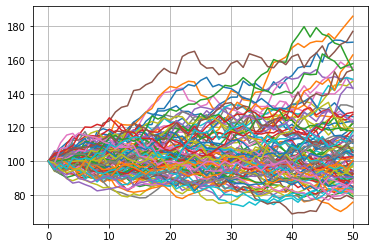

In [14]:
plt.plot(S[:,:100])
plt.grid(True)

# 로그-오일러 이산화 적용

In [15]:
random.seed(20000)

M = 50
dt = T/M
I = 250000

S = S0 * exp(cumsum((r-0.5*sigma**2)*dt+sigma*sqrt(dt)*random.standard_normal((M+1,I)),axis = 0))

# cumsum - 누적
# 경로 전체가 아니라 마지막 값만 필요 - cumsum 대신 sum 

S[0] = S0

C0 = math.exp(-r*T)*sum(maximum(S[-1]-K,0))/I

print(S[0])
print(len(S))
print(len(S[0]))

print('European Option Value %7.3f'%C0)

[100. 100. 100. ... 100. 100. 100.]
51
250000
European Option Value   8.166


Text(0, 0.5, 'S')

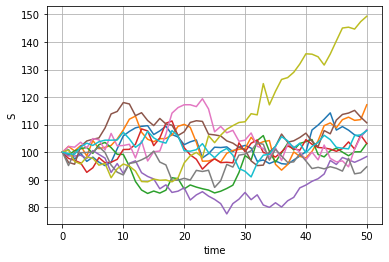

In [16]:
plt.plot(S[:,:10])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('S')

Text(0, 0.5, 'n')

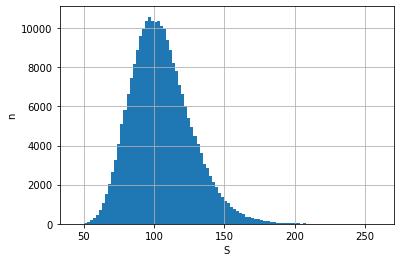

In [17]:
plt.hist(S[-1],bins = 100)
plt.grid(True)
plt.xlabel('S')
plt.ylabel('n')

(0, 150000)

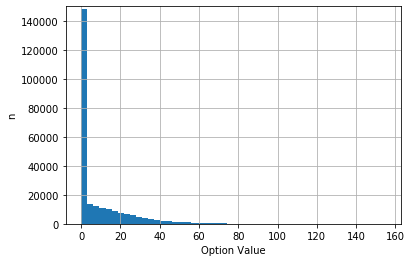

In [18]:
plt.hist(np.maximum(S[-1]-K,0),bins = 50)
plt.grid(True)
plt.xlabel('Option Value')
plt.ylabel('n')
plt.ylim(0,150000)

In [19]:
sum(S[-1]<K)

133533

# 변동성 그래프

In [20]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web # pip install pandas-datareader

In [21]:
goog = web.DataReader('GOOG', data_source = 'yahoo', start = '3/14/2009', end = '4/14/2014')

In [22]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-04-08,553.480408,540.127075,541.114380,553.380676,3151228.0,553.380676
2014-04-09,563.822021,551.436035,558.087769,562.595398,3330820.0,562.595398
2014-04-10,563.453064,538.421753,563.453064,539.468872,4036853.0,539.468872
2014-04-11,538.521484,525.088379,531.091858,529.147217,3924846.0,529.147217
2014-04-14,542.610291,528.110046,536.776306,531.061951,2575050.0,531.061951


In [23]:
goog['Log_ret'] = np.log(goog['Close']/goog['Close'].shift(1))
goog['Volatility'] = goog['Log_ret'].rolling(window = 252, center = False).std() * sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F62F9A2908>,
      dtype=object)

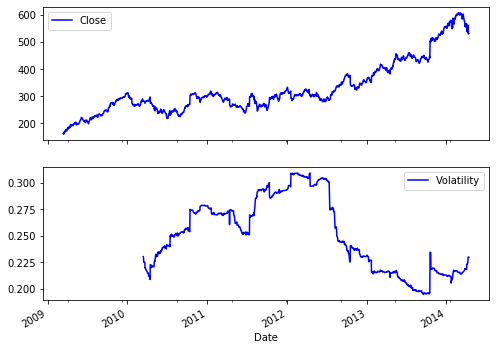

In [24]:
%matplotlib inline
goog[['Close','Volatility']].plot(subplots = True, color = 'blue', figsize = (8,6))